# WOFOST for Simulation with New version 最新版本的研讨


为了解决灌溉优化方面研讨，通过PCSE新版本的测试，发现不应当有的Bug。

## Creating a WOFOST simulation 
## 创建WOFOST模拟
现在，让我们按照步骤运行模拟。首先，让我们为本次研讨会导入相关软件包。
Now, let us follow the steps to run a simulation. First, let us import the relevant packages for this workshop.

In [1]:
from pcse.fileinput import CABOFileReader
from pcse.base import ParameterProvider
from pcse.fileinput import ExcelWeatherDataProvider

from pcse.db import NASAPowerWeatherDataProvider

#from pcse.engine import Engine

from pcse.models import Wofost80_NWLP_FD_beta #, Wofost71_WLP_FD #  Wofost80_WLP_FD_beta

#from pcse.crop.npk_dynamics import NPK_Crop_Dynamics #WofostNPK ## Wofost_NPK

#from pcse.crop.nutrients.npk_demand_uptake import NPK_Demand_Uptake   #NPK_Crop_Dynamics #WofostNPK ## Wofost_NPK

import yaml
import os

### Defining Input Files

Here you can define the input files for your static simulation and the directory where they can be found.

It is important that these files be all in the same directory and that you provide the **absolute** path to this directory in *data_dir*.

Most files have their type specified in the comment. The *config* file is a text file with information regarding the variables and the model in the environment simulation. *WLP_NPK* is a configuration for a simulation that is sensible to water scarcity (a *Water-limited Production*) and to nutrient scarcity (*N, P, and K*).

### 定义输入文件
在这里，您可以定义静态模拟的输入文件以及可以找到它们的目录。
重要的是，这些文件都在同一目录中，并且在*data_dir*中提供指向该目录的**绝对**路径。
大多数文件的类型都在注释中指定。*配置*文件是一个文本文件，其中包含有关环境模拟中的变量和模型的信息*WLP_NPK*（旧版本）是一种模拟配置，对水资源短缺（a* Water-limited Production 水资源有限生产*）和养分短缺（*N、P和K*）敏感。

In [2]:
crop_file_name = "crop.cab" # Must be a CABO file
soil_file_name = "soil.cab" # Must be a CABO file
site_file_name = "site.cab" # Must be a CABO file
agro_file_name = "agro.yaml" # Must be a YAML file
weather_file_name = "weather.xlsx" # Must be a XLSx file

latitude = 44.90052 #52.0
longitude = 82.0713 #135.0

config_file_name = "WLP_NPK.conf"
data_dir = os.path.join(os.getcwd(), 'data')

In [3]:
# This is the initialization of the WOFOST Simulation Environment
# Do not need to edit anything here.

crop = CABOFileReader(os.path.join(data_dir, crop_file_name))
#print(crop)
soil = CABOFileReader(os.path.join(data_dir, soil_file_name))
#print(soil)

site = CABOFileReader(os.path.join(data_dir, site_file_name))
#print(site)
parameterprovider = ParameterProvider(soildata=soil, cropdata=crop, sitedata=site)
#print(parameterprovider)

#weatherdataprovider = ExcelWeatherDataProvider(os.path.join(data_dir, weather_file_name))

# Weather data for Netherlands
weatherdataprovider = NASAPowerWeatherDataProvider(latitude=latitude, longitude=longitude)
#agro_file_name
agromanagement = yaml.load(open(os.path.join(data_dir, agro_file_name)), 
                           Loader=yaml.SafeLoader)['AgroManagement']
#print(config_file_name)
config = os.path.join(data_dir, config_file_name)
#print(config)

#wofost = Engine(parameterprovider, weatherdataprovider, agromanagement, config)

#wofost = Wofost80_WLP_FD_beta(parameterprovider, weatherdataprovider, agromanagement) #, config)
wofost = Wofost80_NWLP_FD_beta(parameterprovider, weatherdataprovider, agromanagement) #, config)

## Simulation Results

Now you can convert the simulation results to a Pandas DataFrame, save them as a CSV file, and Plot them.

Here we have examples of the evolution of the Leaf Area Index (LAI), the Root Zone Soil Moisture (SM), the nutrients available, the weight of the total yield (which in this case is the Total Dry Weight of Storage Organs - TWSO), and the Development Index (a continuous and increasing variable that is 0 at seeding, 1 at flowering, and 2 at maturity)
## At first running that is OK for result of  wofost.get_summary_output()

## 模拟结果
现在，您可以将模拟结果转换为Pandas DataFrame，将其保存为CSV文件，然后绘制它们。
这里我们有叶面积指数（LAI）、根区土壤水分（SM）、可用养分、总产量重量（在本例中为贮藏器官总干重-TWSO）和 DVS 生育期变量（发育指数 一个连续不断增加的变量，播种时为0，开花时为1，成熟时为2）的演变示例

## 第一次运行时，wofost.get_summary_output（）的结果还是正确的

In [4]:
import pandas as pd

# Convert the simulation results to a DataFrame
# Save the DataFrame as a csv file

#print(wofost.get_output())

wofost.run_till_terminate()

df = pd.DataFrame(wofost.get_output())

df.to_csv('simulation_results.csv')
df = df.set_index("day")
water_losed_into_deep_horizont = wofost.get_terminal_output()
sum_water = water_losed_into_deep_horizont['PERCT'] + water_losed_into_deep_horizont['LOSST']

result = wofost.get_summary_output()
# At first running that is OK for result of  wofost.get_summary_output()
# print("result=",result)
#r=result
# print("water_losed_into_deep_horizont=",water_losed_into_deep_horizont)

df_Nature=df
df.tail()

result= [{'DVS': 2.0, 'LAIMAX': 1.024150484511988, 'TAGP': 3309.1462608188995, 'TWSO': 554.4015320088222, 'TWLV': 1192.2559646504537, 'TWST': 1562.4887641596233, 'TWRT': 751.4552110077633, 'CTRAT': 10.402818646546073, 'RD': 120.0, 'DOS': None, 'DOE': datetime.date(2006, 1, 1), 'DOA': datetime.date(2006, 6, 20), 'DOM': datetime.date(2006, 8, 6), 'DOH': None, 'DOV': None, 'CEVST': 15.633587753981457, 'NuptakeTotal': 37.69800000000022, 'PuptakeTotal': 4.814963399153191, 'KuptakeTotal': 28.466372716507998, 'NamountSO': 9.417032851109107, 'PamountSO': 1.3911525802774818, 'KamountSO': 2.5682816866661202}]
water_losed_into_deep_horizont= {'WTRAT': 10.402818646546073, 'EVST': 17.316758462090334, 'EVWT': 0.0, 'TSR': 0.0, 'RAINT': 24.81800000000002, 'TOTINF': 24.81800000000002, 'TOTIRR': 0.0, 'PERCT': 5.244961513255879, 'LOSST': 17.246047681427598}


,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,...,KAVAIL,Ndemand,RNuptake,Pdemand,RPuptake,Kdemand,RKuptake,NamountSO,PamountSO,KamountSO
day,,,,,,,,,,,,,,,,,,,,,
2006-08-02,1.90261,0.031717,3309.146261,554.401532,1192.255965,1562.488764,751.455211,0.007887,120.0,0.382509,...,0.177,0.0,0.0,0.0,0.0,12.219463,0.177,9.238592,1.364792,2.519616
2006-08-03,1.92682,0.023750,3309.146261,554.401532,1192.255965,1562.488764,751.455211,0.005605,120.0,0.380250,...,0.268,0.0,0.0,0.0,0.0,11.679647,0.268,9.290479,1.372457,2.533767
2006-08-04,1.95281,0.017748,3309.146261,554.401532,1192.255965,1562.488764,751.455211,0.002487,120.0,0.380446,...,0.359,0.0,0.0,0.0,0.0,11.048039,0.359,9.337178,1.379356,2.546503
2006-08-05,1.97812,0.010251,3309.146261,554.401532,1192.255965,1562.488764,751.455211,0.002517,120.0,0.380185,...,0.450,0.0,0.0,0.0,0.0,10.340127,0.450,9.379207,1.385565,2.557966
2006-08-06,2.00000,0.005890,3309.146261,554.401532,1192.255965,1562.488764,751.455211,0.001429,120.0,0.379603,...,0.541,0.0,0.0,0.0,0.0,9.571915,0.541,9.417033,1.391153,2.568282


## Variables Shown

We have a huge dataset with values for different crop and soil parameters during our simulated crop campaign. The variables to be outputted are defined in the configuration file (*WLP_NPK.conf*) and detailed descriptions of them can be found on WOFOST and PCSE documentation. 

From a data science perspective, we are not interested in the deep relations between the variables that define how the mechanism of simulation is done. What are some key variables that impact the crop that we should look at?

* Crop development
    * DVS: Development stage
    * TWSO: Total weight of storage organs (kg/ha)]
* Water Balance
    * SM: Volumetric moisture content in root zone
    * WWLOW: Total amount of water in the soil profile (cm)
* Nutrients Availability
    * NAVAIL: Total amount of available N (kg/ha)
    * PAVAIL: Total amount of available P (kg/ha)
    * KAVAIL: Total amount of available K (kg/ha)
    
We consider TWSO as a key variable because it can be seen as the yield, since the most important yield of a wheat crop are its storage organs (grains).

## 显示的变量
我们有一个巨大的数据集，其中包含模拟作物活动期间不同作物和土壤参数的值。要输出的变量在可以写在配置文件（*WLP_NPK.conf*）中定义，其详细描述可在WOFOST和PCSE文档中找到。
从数据科学的角度来看，我们对定义模拟机制的变量之间的深层关系不感兴趣。我们应该关注哪些影响作物的关键变量？
* 作物
* DVS：生育阶段
* TWSO：储存器官的总重量（kg/ha）]
* 水平衡
* SM：根区的体积含水量
* WWLOW：土壤剖面中的总水量（cm）
* 营养素可用性
* NAVAIL：有效氮总量（kg/ha）
* PAVAIL：有效磷总量（kg/ha）
* KAVAIL：有效钾总量（kg/ha）
我们认为TWSO是一个关键变量（状态量），因为它可以被视为产量，因为小麦作物最重要的产量是其储藏器官（谷物）。

In [5]:
key_params = ['DVS', 'TWSO', 'SM', 'WWLOW', 'NAVAIL', 'PAVAIL', 'KAVAIL']
df[key_params].tail()

,DVS,TWSO,SM,WWLOW,NAVAIL,PAVAIL,KAVAIL
day,,,,,,,
2006-08-02,1.90261,554.401532,0.382509,45.901071,0.637,0.537,0.177
2006-08-03,1.92682,554.401532,0.380250,45.630054,0.728,0.628,0.268
2006-08-04,1.95281,554.401532,0.380446,45.653554,0.819,0.719,0.359
2006-08-05,1.97812,554.401532,0.380185,45.622199,0.910,0.810,0.450
2006-08-06,2.00000,554.401532,0.379603,45.552375,1.001,0.901,0.541


## Plotting Important Variables

Given the important variables we want to track we can use matplotlib.

### Crop Development

## 绘制重要变量
考虑到我们想要跟踪的重要变量，我们可以使用matplotlib。
### 作物生长

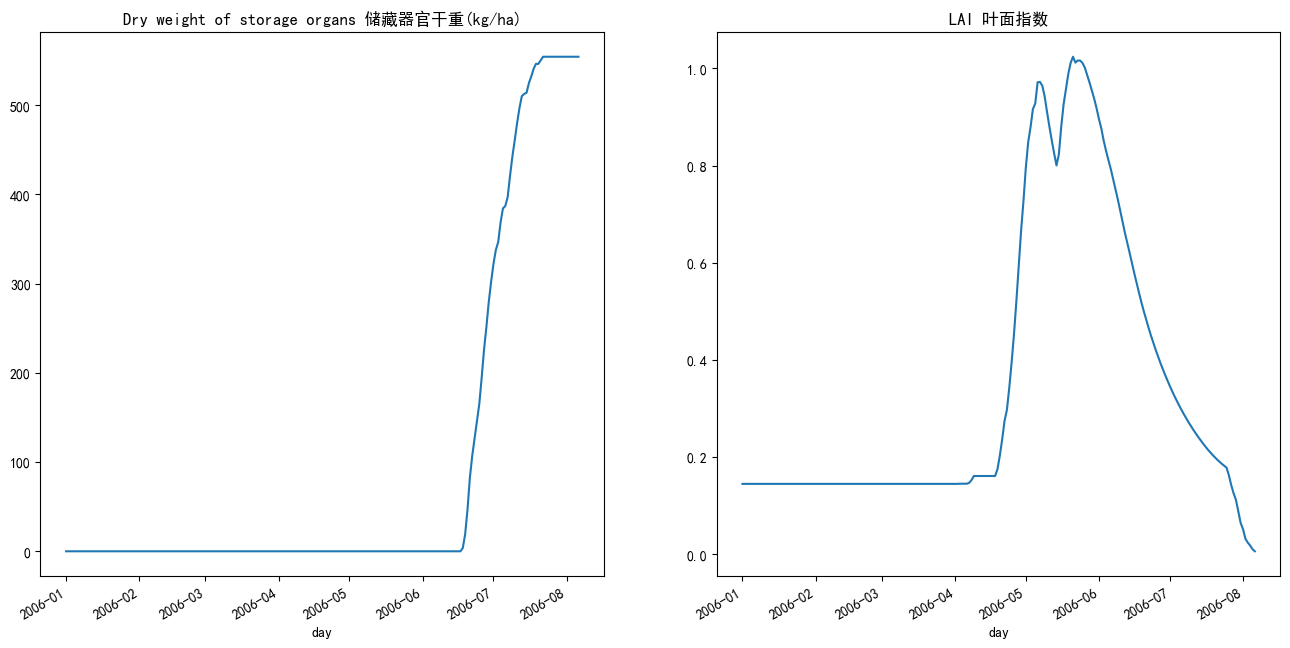

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
plt.rcParams['font.serif'] = ['KaiTi']

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# plot grid organization
df['LAI'].plot(ax=axes[1], title="LAI 叶面指数")                           # DVS plot
df['TWSO'].plot(ax=axes[0], title="Dry weight of storage organs 储藏器官干重(kg/ha)") # TWSO plot
fig.autofmt_xdate()                                                             # rotate date labels

### Water Balance

Now, let us create two plots showing the soil moisture (SM) and total amount of water in soil (WWLOW)

### 水平衡
现在，让我们创建两个图，显示土壤湿度（SM）和土壤中的总水量（WWLOW）


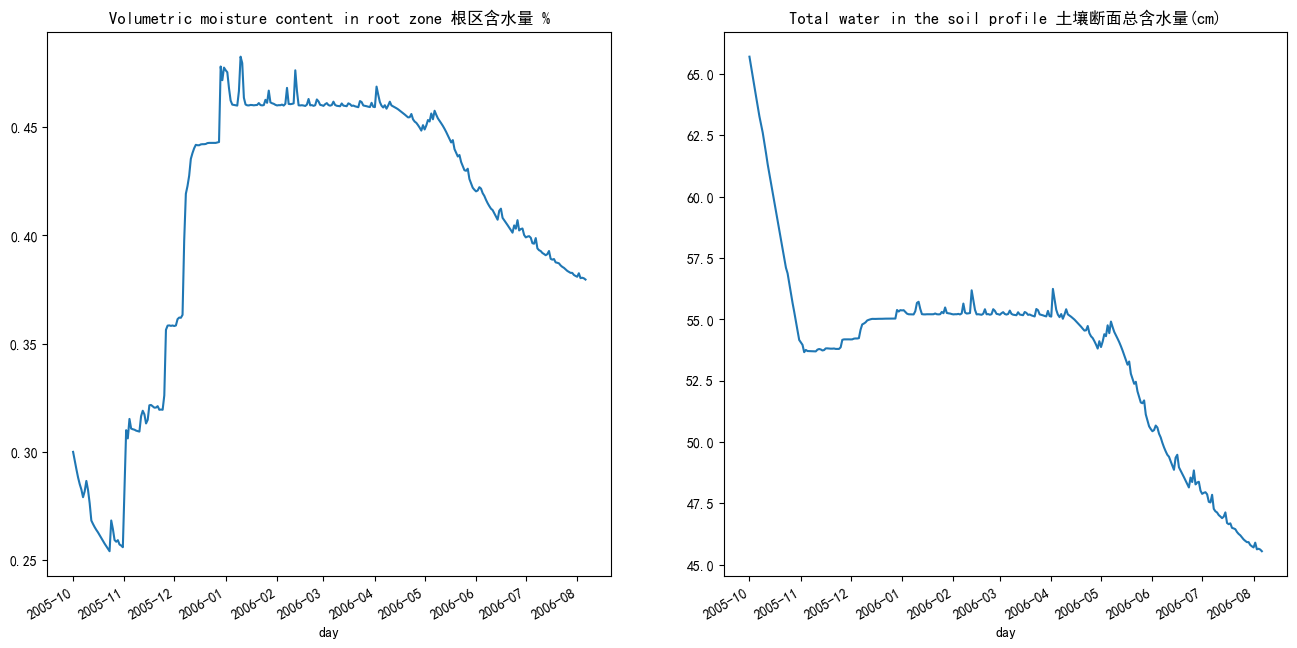

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

##### YOUR CODE HERE #####

# Plot Soil Moisture
df['SM'].plot(ax=axes[0], title="Volumetric moisture content in root zone 根区含水量 %")

# Plot Total Amount of Water
df['WWLOW'].plot(ax=axes[1], title="Total water in the soil profile 土壤断面总含水量(cm)")
##########################

fig.autofmt_xdate()

### Nutrient Availability 有效营养素

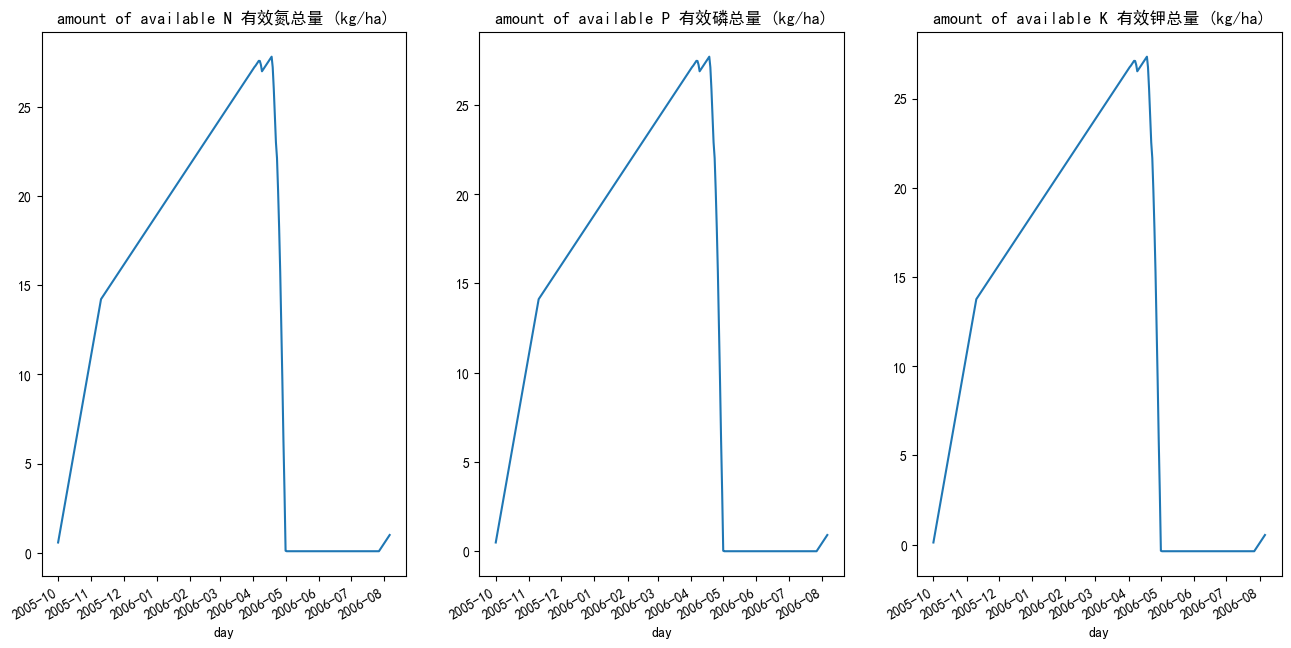

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

##### YOUR CODE HERE #####

# Plot N Availability
df['NAVAIL'].plot(ax=axes[0], title="amount of available N 有效氮总量 (kg/ha)")

# Plot P Availability
df['PAVAIL'].plot(ax=axes[1], title="amount of available P 有效磷总量 (kg/ha)")

# Plot K Availability
df['KAVAIL'].plot(ax=axes[2], title="amount of available K 有效钾总量 (kg/ha)")
##########################

fig.autofmt_xdate()

## Agromanagement Decisions

Now that you have understanding of what the simulation is and how to extract its outputs, let us begin to understand the inputs and how they modify the simulation. First, let us understand the impact of the agromanagement actions taken, *i.e.*, **irrigation** and **fertilization**.

To modify the agromanagement actions, we need to modify the agromanagement input file. Right now, it is the file *agro.yaml*. If you open it, you will see the following:

## 农业管理项的决策
现在您已经了解了模拟是什么以及如何提取其输出，让我们开始了解输入以及它们如何修改模拟。首先，让我们了解所采取的农业管理行动的影响，即*、**灌溉**和**施肥**。
要修改农业管理操作，我们需要修改农业管理项输入文件。现在，它是文件*agro.yaml*。如果打开它，您将看到以下内容：

```YAML
Version: 1.0
AgroManagement:
- 2005-10-01:
    CropCalendar:
        crop_name: wheat
        variety_name: winter-wheat
        crop_start_date: 2006-01-01
        crop_start_type: emergence
        crop_end_date: 
        crop_end_type: maturity
        max_duration: 300
    TimedEvents: null
    StateEvents: null
```

### Adding Irrigation

You can notice that there are no events specified, *i.e.*, no irrigation of fertilization actions. Let us try to introduce an irrigation action and see the changes it will make on the simulation.

If you open the file *agro-irrigate.yaml*, you will see the following:

### 添加灌溉
您可以注意到，没有指定任何事件，例如，没有灌溉施肥操作。让我们试着引入一个灌溉动作，看看它会在模拟中产生什么变化。
如果你打开文件*agro-SM.yaml*，您将看到以下内容：


```YAML
Version: 1.0
AgroManagement:
- 2005-10-01:
    CropCalendar:
        crop_name: wheat
        variety_name: winter-wheat
        crop_start_date: 2006-01-01
        crop_start_type: emergence
        crop_end_date: 
        crop_end_type: maturity
        max_duration: 300
    StateEvents:
    -   event_signal: irrigate
        event_state: SM
        zero_condition: falling
        name: irrigation scheduling on volumetric soil moisture content
        comment: all irrigation amounts in cm
        events_table:
        - 0.4: {amount: 10, efficiency: 0.7}
```




In [9]:
agro_file_name = "agro-SM.yaml"
agromanagement = yaml.load(open(os.path.join(data_dir, agro_file_name)), 
                           Loader=yaml.SafeLoader)['AgroManagement']
#wofost = Engine(parameterprovider, weatherdataprovider, agromanagement, config)
#Wofost80_WLP_FD_beta Wofost80_NWLP_FD_beta Wofost71_WLP_FD
SM_wofost = Wofost80_NWLP_FD_beta(parameterprovider, weatherdataprovider, agromanagement) #, config)


SM_wofost.run_till_terminate()
df_irrigate = pd.DataFrame(SM_wofost.get_output())
SM_result=[df_irrigate.iloc[-1]['day'],df_irrigate.iloc[-1]['TWSO']]

df_irrigate = df_irrigate.set_index("day")

SM_water_losed_into_deep_horizont = SM_wofost.get_terminal_output()
SM_sum_water = water_losed_into_deep_horizont['PERCT'] + water_losed_into_deep_horizont['LOSST']

_result =SM_wofost.get_summary_output() #df_irrigate.iloc[-1] #['TWSO'] # SM_wofost.get_summary_output()
#SM_result=result
# At first running that is OK for result of  wofost.get_summary_output()
# print("result=",_result)
# At second running that is not OK for SM_result of  wofost.get_summary_output()
# that come out with noting!!!
#print("result=",_result)

# print("SM=",SM_result)
#print("SM=",SM_result)

# print("out=",SM_water_losed_into_deep_horizont)
df_SM=df_irrigate
df_irrigate[key_params].tail()

result= []
SM= [datetime.date(2006, 8, 1), 554.4015320088222]
out= {'WTRAT': 10.37366884441664, 'EVST': 18.436059282020484, 'EVWT': 0.0, 'TSR': 0.0, 'RAINT': 24.481000000000016, 'TOTINF': 31.481000000000016, 'TOTIRR': 7.0, 'PERCT': 5.244961513255879, 'LOSST': 17.246047681427598}


,DVS,TWSO,SM,WWLOW,NAVAIL,PAVAIL,KAVAIL
day,,,,,,,
2006-07-28,1.77833,554.401532,0.428882,51.465814,0.182,0.082,-0.278
2006-07-29,1.80005,554.401532,0.428650,51.437997,0.273,0.173,-0.187
2006-07-30,1.82341,554.401532,0.427437,51.292397,0.364,0.264,-0.096
2006-07-31,1.84968,554.401532,0.426722,51.206639,0.455,0.355,-0.005
2006-08-01,1.87813,554.401532,0.426044,51.125224,0.546,0.446,0.086


## At second running that is not OK for SM_result of  wofost.get_summary_output()
## that come out with noting!!!
## 第二次运行时，wofost.get_summary_output（）的结果是空 LIST， SM= []


Let us compare the water balance in the soil with and without irrigation, plotting the two simulation outputs against each other using matplotlib.

让我们比较有灌溉和没有灌溉的土壤中的水平衡，使用matplotlib绘制两个模拟输出的对比图。

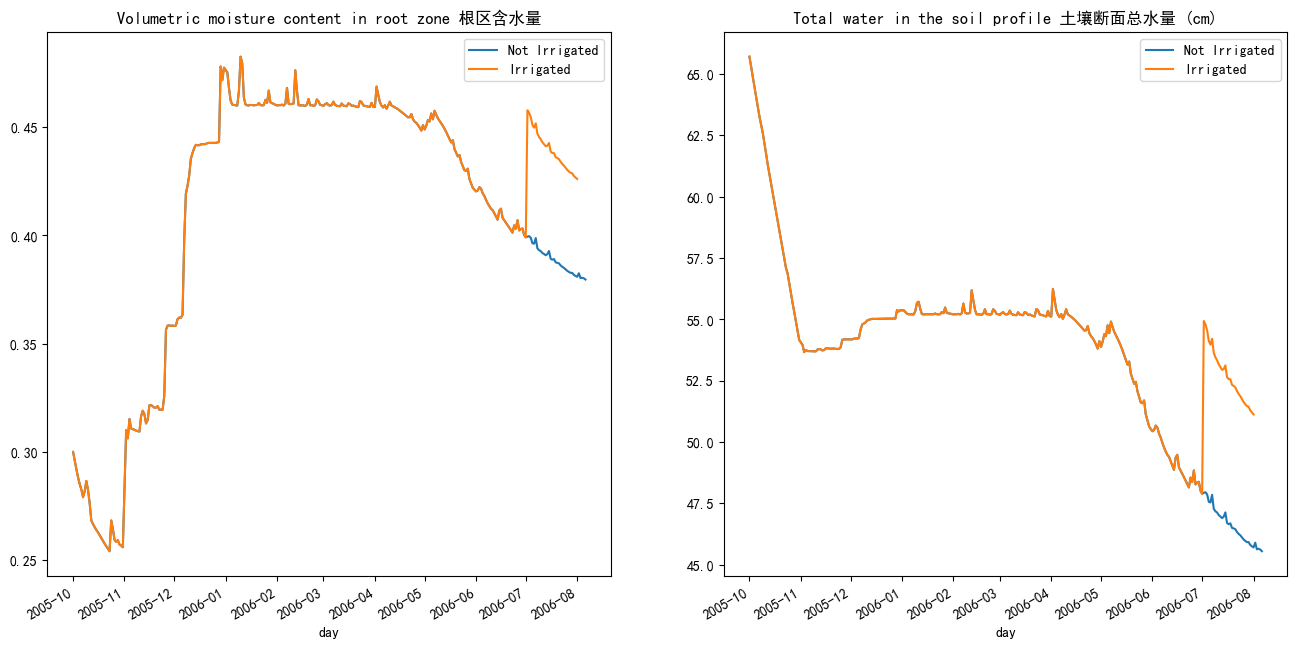

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# Soil moisture in non irrigated simulation
df['SM'].plot(ax=axes[0], title="Volumetric moisture content in root zone 根区含水量", label='Not Irrigated')

# Soil moisture in irrigated simulation
df_irrigate['SM'].plot(ax=axes[0], title="Volumetric moisture content in root zone 根区含水量", label='Irrigated')
axes[0].legend()


##### YOUR CODE HERE #####

# Plot total amount of water
df['WWLOW'].plot(ax=axes[1], title="Total water in the soil profile 土壤断面总水量(cm)", label='Not Irrigated')
df_irrigate['WWLOW'].plot(ax=axes[1], title="Total water in the soil profile 土壤断面总水量 (cm)", label='Irrigated')
axes[1].legend()

##########################

fig.autofmt_xdate()

As you can see, irrigating elevated the root zone soil moisture and the total water in the soil in the exact days in which irrigation was applied. 

However, did the irrigation affect the crop development? Let us plot and compare:

正如你所看到的，灌溉提高了根区土壤的水分和土壤中的总水分，在精确的灌溉日子里。
然而，灌溉是否影响作物生长？让我们绘制并比较：


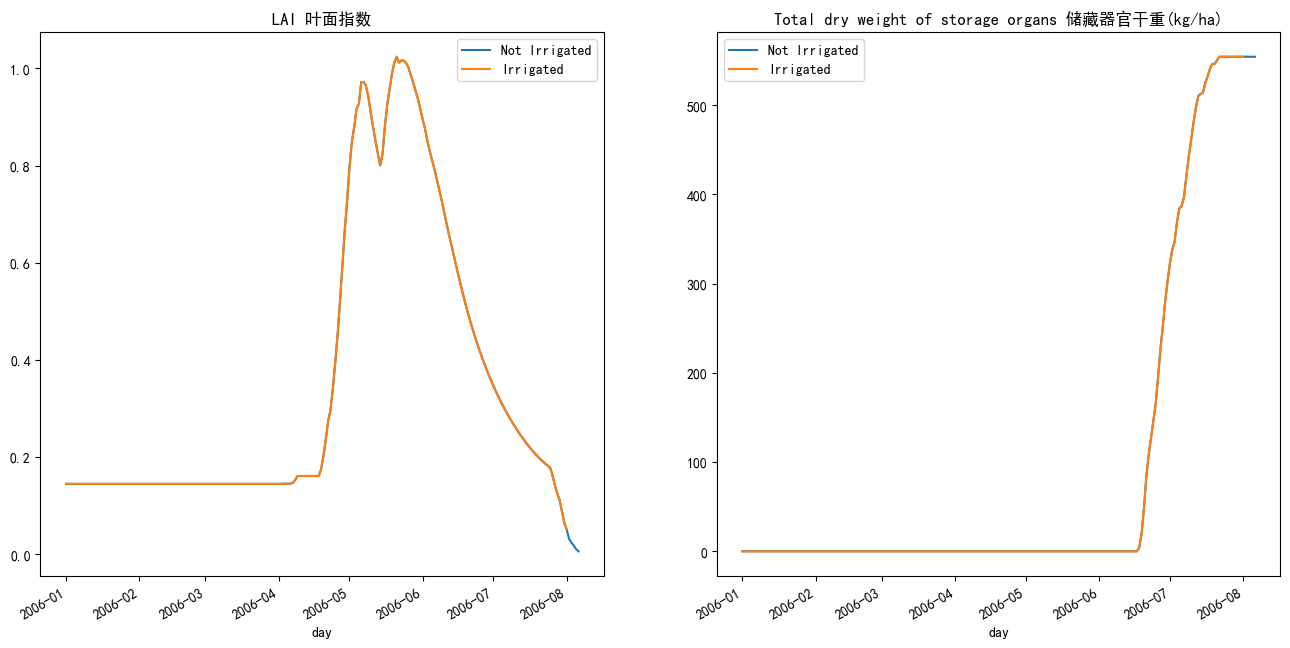

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# Plot the DVS
df['LAI'].plot(ax=axes[0], title="LAI 叶面指数", label='Not Irrigated')
df_irrigate['LAI'].plot(ax=axes[0], title="LAI 叶面指数", label='Irrigated')
axes[0].legend()

# Plot the TWSO
df['TWSO'].plot(ax=axes[1], title="Total dry weight of storage organs 储藏器官干重(kg/ha)", label='Not Irrigated')
df_irrigate['TWSO'].plot(ax=axes[1], title="Total dry weight of storage organs 储藏器官干重(kg/ha)", label='Irrigated')
axes[1].legend()

fig.autofmt_xdate()

### Adding Irrigation

You can notice that there are no events specified, *i.e.*, no irrigation of fertilization actions. Let us try to introduce an irrigation action and see the changes it will make on the simulation.

If you open the file *agro-DVS.yaml*, you will see the following:

### 添加灌溉
您可以注意到，没有指定任何事件，例如，没有施肥操作。让我们试着引入一个根据DVS进行的灌溉动作，看看它会在模拟中产生什么变化。
如果你打开文件*agro-DVS.yaml*，您将看到以下内容：


```YAML
Version: 1.0
AgroManagement:
- 2005-10-01:
    CropCalendar:
        crop_name: wheat
        variety_name: winter-wheat
        crop_start_date: 2006-01-01
        crop_start_type: emergence
        crop_end_date: 
        crop_end_type: maturity
        max_duration: 300
    StateEvents:
        -   event_signal: irrigate
            event_state: DVS
            zero_condition: rising
            name: Irrigation application table
            comment: All irrigation amounts in cm
            events_table:
            - 0.9: {amount: 10, efficiency: 0.7}
            - 1.5: {amount:  5, efficiency: 0.7}

In [12]:
agro_file_name = "agro-DVS.yaml"
agromanagement = yaml.load(open(os.path.join(data_dir, agro_file_name)), 
                           Loader=yaml.SafeLoader)['AgroManagement']
#wofost = Engine(parameterprovider, weatherdataprovider, agromanagement, config)
#Wofost80_WLP_FD_beta Wofost80_NWLP_FD_beta
wofost = Wofost80_NWLP_FD_beta(parameterprovider, weatherdataprovider, agromanagement) #, config)


wofost.run_till_terminate()
df_irrigate = pd.DataFrame(wofost.get_output())
DVS_result=[df_irrigate.iloc[-1]['day'],df_irrigate.iloc[-1]['TWSO']]

df_irrigate = df_irrigate.set_index("day")
DVS_water_losed_into_deep_horizont = wofost.get_terminal_output()
DVS_sum_water = water_losed_into_deep_horizont['PERCT'] + water_losed_into_deep_horizont['LOSST']

#wofost.run_till_terminate()
#DVS_result =df_irrigate.iloc[-1] # wofost.get_summary_output()
# At more running that is not OK for DVS_result of  wofost.get_summary_output()
# that come out with noting!!!

# print("DVS_result=",DVS_result)
# print("out=",DVS_water_losed_into_deep_horizont)
df_DVS=df_irrigate
df_irrigate[key_params].tail()

DVS_result= [datetime.date(2006, 8, 1), 554.4015320088222]
out= {'WTRAT': 10.37366884441664, 'EVST': 19.566241241571333, 'EVWT': 0.0, 'TSR': 0.0, 'RAINT': 24.481000000000016, 'TOTINF': 34.98100000000003, 'TOTIRR': 10.5, 'PERCT': 5.984961513255879, 'LOSST': 17.9860476814276}


,DVS,TWSO,SM,WWLOW,NAVAIL,PAVAIL,KAVAIL
day,,,,,,,
2006-07-28,1.77833,554.401532,0.443297,53.195668,0.182,0.082,-0.278
2006-07-29,1.80005,554.401532,0.442853,53.142389,0.273,0.173,-0.187
2006-07-30,1.82341,554.401532,0.441439,52.972708,0.364,0.264,-0.096
2006-07-31,1.84968,554.401532,0.440524,52.862845,0.455,0.355,-0.005
2006-08-01,1.87813,554.401532,0.439625,52.755042,0.546,0.446,0.086


## At more running that is not OK for DVS_result of  wofost.get_summary_output()
## that come out with noting!!!
## 在运行时，这对于wofost.get_summary_output（）的 DVS_result 来说是不正常的
## DVS_result=[] 什么也没有！！！

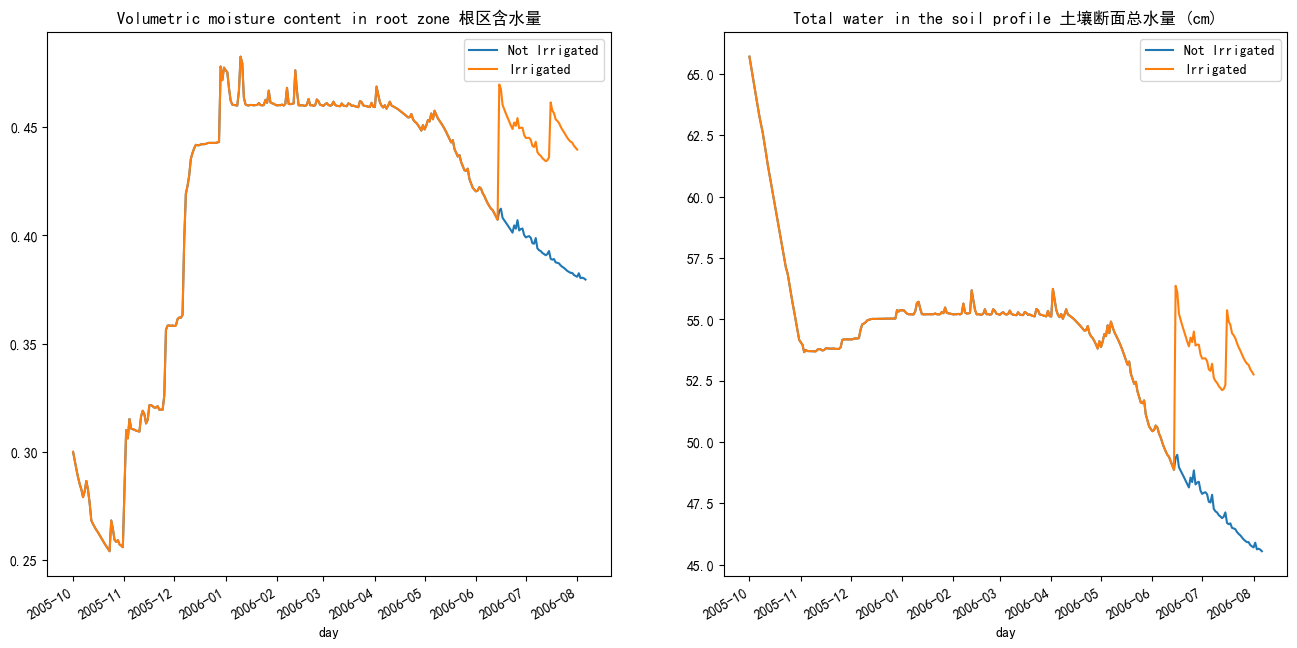

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# Soil moisture in non irrigated simulation
df['SM'].plot(ax=axes[0], title="Volumetric moisture content in root zone 根区含水量", label='Not Irrigated')

# Soil moisture in irrigated simulation
df_irrigate['SM'].plot(ax=axes[0], title="Volumetric moisture content in root zone 根区含水量", label='Irrigated')
axes[0].legend()


##### YOUR CODE HERE #####

# Plot total amount of water
df['WWLOW'].plot(ax=axes[1], title="Total water in the soil profile 土壤断面总水量(cm)", label='Not Irrigated')
df_irrigate['WWLOW'].plot(ax=axes[1], title="Total water in the soil profile 土壤断面总水量 (cm)", label='Irrigated')
axes[1].legend()

##########################

fig.autofmt_xdate()

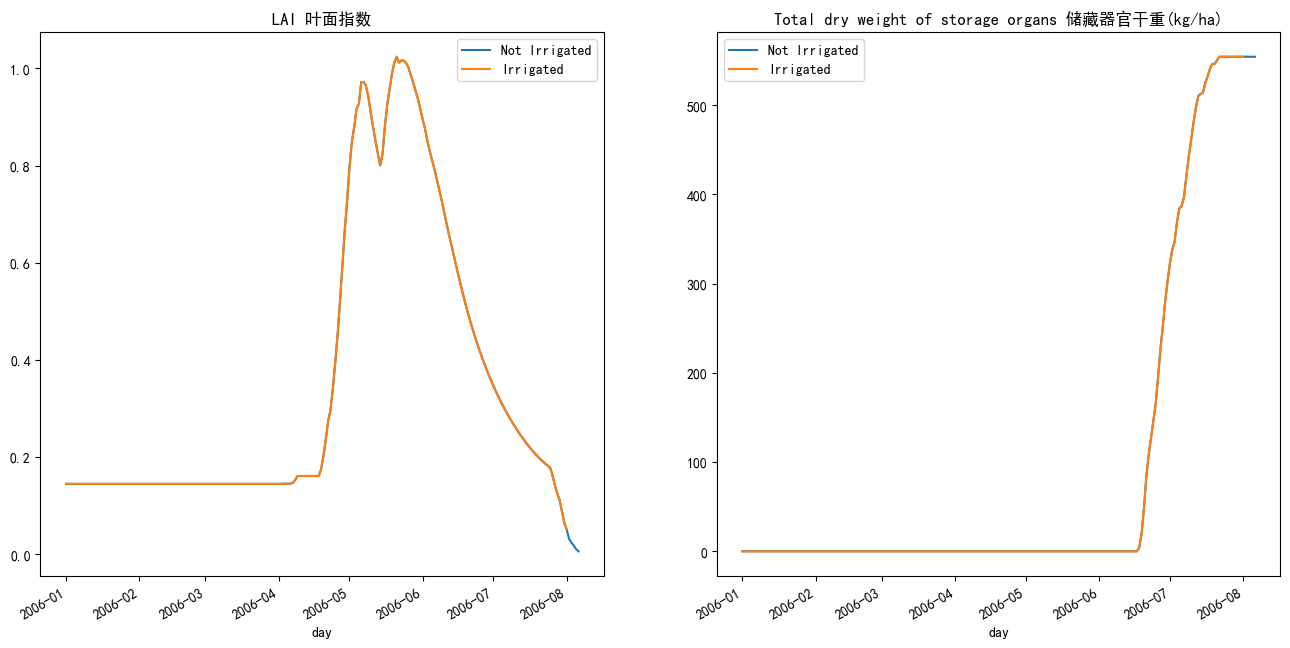

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# Plot the DVS
df['LAI'].plot(ax=axes[0], title="LAI 叶面指数", label='Not Irrigated')
df_irrigate['LAI'].plot(ax=axes[0], title="LAI 叶面指数", label='Irrigated')
axes[0].legend()

# Plot the TWSO
df['TWSO'].plot(ax=axes[1], title="Total dry weight of storage organs 储藏器官干重(kg/ha)", label='Not Irrigated')
df_irrigate['TWSO'].plot(ax=axes[1], title="Total dry weight of storage organs 储藏器官干重(kg/ha)", label='Irrigated')
axes[1].legend()

fig.autofmt_xdate()

我们可以看到，不同的灌溉决策条件影响作物的生长。
*可利用的水（可用性）只是一个限制因素**
*灌溉影响发展这一事实意味着，在灌溉作物中，水的可用性是作物实现**潜在产量的限制因素**

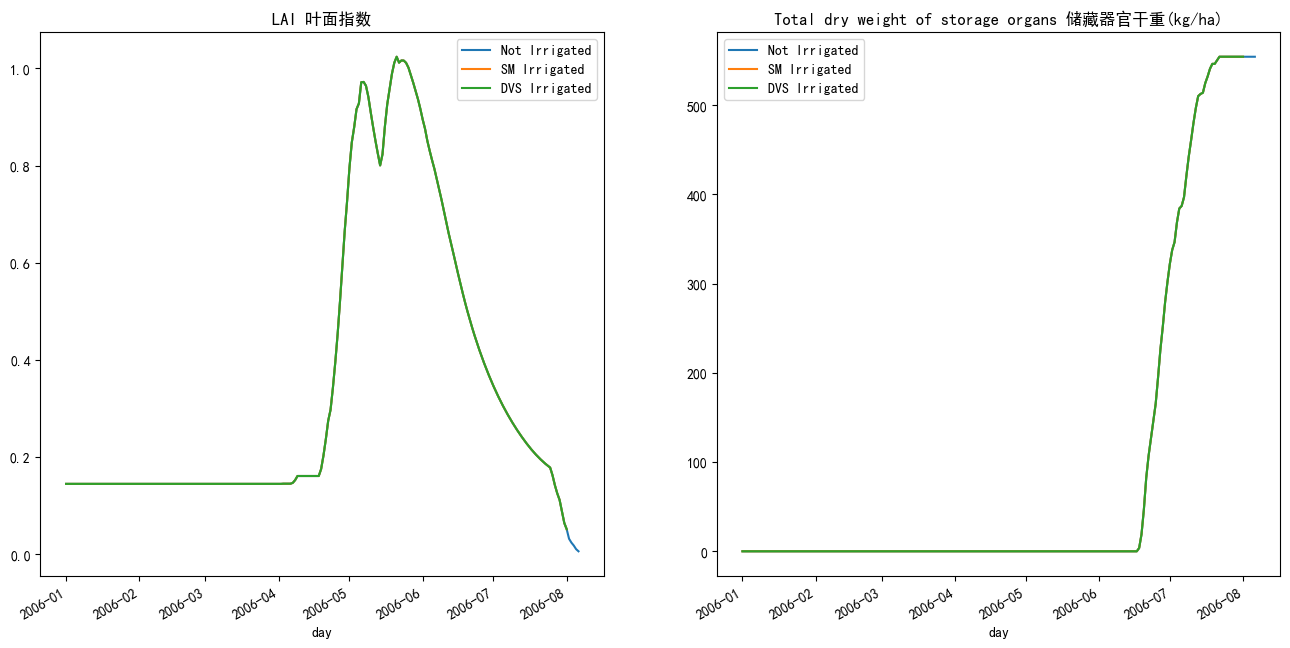

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# Plot the DVS
df['LAI'].plot(ax=axes[0], title="LAI 叶面指数", label='Not Irrigated')
df_SM['LAI'].plot(ax=axes[0], title="LAI 叶面指数", label='SM Irrigated')
df_DVS['LAI'].plot(ax=axes[0], title="LAI 叶面指数", label='DVS Irrigated')
axes[0].legend()

# Plot the TWSO
df['TWSO'].plot(ax=axes[1], title="Total dry weight of storage organs 储藏器官干重(kg/ha)", label='Not Irrigated')
df_SM['TWSO'].plot(ax=axes[1], title="Total dry weight of storage organs 储藏器官干重(kg/ha)", label='SM Irrigated')
df_DVS['TWSO'].plot(ax=axes[1], title="Total dry weight of storage organs 储藏器官干重(kg/ha)", label='DVS Irrigated')
axes[1].legend()

fig.autofmt_xdate()

施肥的同时又灌溉看看情况又如何！
Version: 1.0
AgroManagement:
- 2005-10-01:
    CropCalendar:
        crop_name: wheat
        variety_name: winter-wheat
        crop_start_date: 2006-01-01
        crop_start_type: emergence
        crop_end_date: 
        crop_end_type: maturity
        max_duration: 300
    TimedEvents:
    -   event_signal: apply_npk
        name: Timed N/P/K application table
        comment: All fertilizer amounts in kg/ha
        events_table:
        - 2006-04-01: {N_amount: 100, P_amount: 100, K_amount: 100, N_recovery: 0.7, P_recovery: 0.7, K_recovery: 0.7}
        - 2006-04-15: {N_amount: 200, P_amount: 0, K_amount: 200, N_recovery: 0.7, P_recovery: 0.7, K_recovery: 0.7}
        - 2006-05-01: {N_amount: 0, P_amount: 0, K_amount: 200, N_recovery: 0.7, P_recovery: 0.7, K_recovery: 0.7}
    StateEvents:
    -   event_signal: irrigate
        event_state: SM
        zero_condition: falling
        name: irrigation scheduling on volumetric soil moisture content
        comment: all irrigation amounts in cm
        events_table:
        - 0.35: {amount: 10, efficiency: 0.7}
- 2006-08-01:


In [16]:
agro_file_name = "agro-conditional-irrigation.yaml"
agromanagement = yaml.load(open(os.path.join(data_dir, agro_file_name)), 
                           Loader=yaml.SafeLoader)['AgroManagement']
#wofost = Engine(parameterprovider, weatherdataprovider, agromanagement, config)
#Wofost80_WLP_FD_beta Wofost80_NWLP_FD_beta
wofost = Wofost80_NWLP_FD_beta(parameterprovider, weatherdataprovider, agromanagement) #, config)
wofost.run_till_terminate()

#ConditionalSM_result=[]
#ConditionalSM_result =df_irrigate.iloc[-1] # wofost.get_summary_output()


# At more running that is not OK for DVS_result of  wofost.get_summary_output()
# that come out with noting!!!
#.get_summary_output())

df_irrigate = pd.DataFrame(wofost.get_output())
ConditionalSM_result=[df_irrigate.iloc[-1]['day'],df_irrigate.iloc[-1]['TWSO']]
# print("ConditionalSM_result",ConditionalSM_result) 

df_irrigate = df_irrigate.set_index("day")
ConditionalSM_water_losed_into_deep_horizont = wofost.get_terminal_output()
ConditionalSM_sum_water = water_losed_into_deep_horizont['PERCT'] + water_losed_into_deep_horizont['LOSST']

# print("ConditionalSM_sum_water",ConditionalSM_water_losed_into_deep_horizont)

df_ConditionalSM=df_irrigate
df_irrigate[key_params].tail()

,DVS,TWSO,SM,WWLOW,NAVAIL,PAVAIL,KAVAIL
day,,,,,,,
2006-07-28,1.77833,2908.910865,0.370105,44.412575,75.893457,-64.206543,215.433457
2006-07-29,1.80005,2908.910865,0.369098,44.291765,75.984457,-64.115543,215.524457
2006-07-30,1.82341,2908.910865,0.367130,44.055644,76.075457,-64.024543,215.615457
2006-07-31,1.84968,2908.910865,0.365758,43.890916,76.166457,-63.933543,215.706457
2006-08-01,1.87813,2908.910865,0.364548,43.745777,76.257457,-63.842543,215.797457


ConditionalSM_result = wofost.get_summary_output()
## At more running that is not OK for DVS_result of  wofost.get_summary_output()
## that come out with noting!!!
print("ConditionalSM_result",wofost.get_summary_output())
ConditionalSM_result=[]


## 在运行时，这对于wofost.get_summary_output（）的DVS_result来说是不正常的
## 什么也没有！！！
打印（“ConditionalSM_result”，wofost.get_summary_output（））=[]

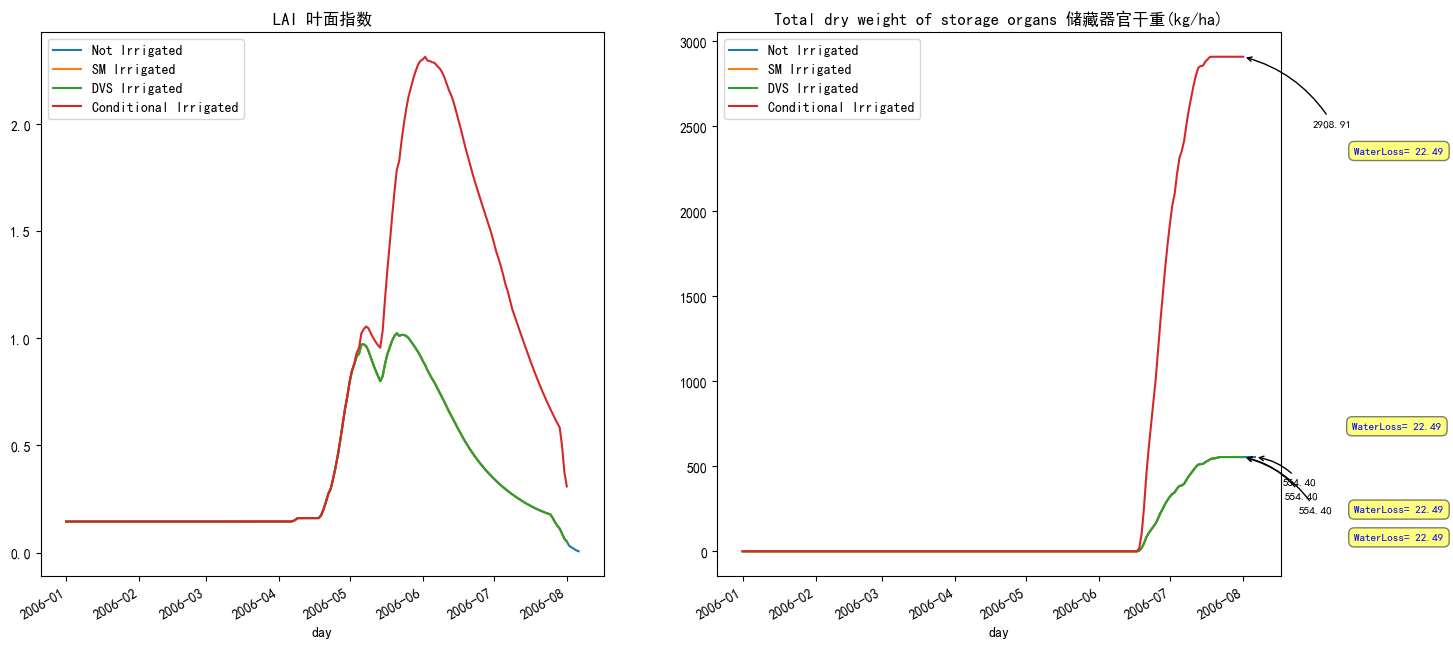

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# Plot the DVS
df['LAI'].plot(ax=axes[0], title="LAI 叶面指数", label='Not Irrigated')
df_SM['LAI'].plot(ax=axes[0], title="LAI 叶面指数", label='SM Irrigated')
df_DVS['LAI'].plot(ax=axes[0], title="LAI 叶面指数", label='DVS Irrigated')
df_ConditionalSM['LAI'].plot(ax=axes[0], title="LAI 叶面指数", label='Conditional Irrigated')
axes[0].legend()

# Plot the TWSO
df['TWSO'].plot(ax=axes[1], title="Total dry weight of storage organs 储藏器官干重(kg/ha)", label='Not Irrigated ')
df_SM['TWSO'].plot(ax=axes[1], title="Total dry weight of storage organs 储藏器官干重(kg/ha)", label='SM Irrigated')
df_DVS['TWSO'].plot(ax=axes[1], title="Total dry weight of storage organs 储藏器官干重(kg/ha)", label='DVS Irrigated')
df_ConditionalSM['TWSO'].plot(ax=axes[1], title="Total dry weight of storage organs 储藏器官干重(kg/ha)", label='Conditional Irrigated')

# At more running that is not OK for DVS_result of  wofost.get_summary_output()
# that come out with noting!!!

# print("result[0]TWSO=",result[0]['TWSO'])
# print("result[0]TWSO=",type(result[0]['TWSO']))


# print("SM=",type(SM_result))
# print("SM=",type(SM_result[0]))
# print("SM=",SM_result[0])
# print("DVS=",DVS_result[0])

# print("ConditionalSM_result=",ConditionalSM_result[0])
# print("SM=",SM_result[1])
# print("DVS=",DVS_result[1])
# print("ConditionalSM_result=",ConditionalSM_result[1])

# print("result[0]=",result[0]['DOM'])
# print("result[0]=",type(result[0]['DOM']))

#str1=str(result[0]['TWSO']) #.toString()'%.2f'%f
plt.annotate('%.2f'%result[0]['TWSO'] , xy=(result[0]['DOM'], result[0]['TWSO']),
            xycoords='data',
            xytext=(20,-20),
            textcoords='offset points',
            fontsize=8,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3,rad=.2"))

plt.annotate( 'WaterLoss= %.2f'%sum_water , xy=(result[0]['DOM'], result[0]['TWSO']),
            xycoords='data',
            xytext=(70,10),
            textcoords='offset points',
            color ='b',
            fontsize=8,
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k', lw=1, alpha=0.50)
            )
plt.annotate('%.2f'%SM_result[1] , xy=(SM_result[0], SM_result[1]),
            xycoords='data',
            xytext=(30,-30),
            textcoords='offset points',
            fontsize=8,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3,rad=.2"))
plt.annotate( 'WaterLoss= %.2f'%SM_sum_water , xy=(SM_result[0], SM_result[1]),
            xycoords='data',
            xytext=(80,-40),
            textcoords='offset points',
            color ='b',
            fontsize=8,
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k', lw=1, alpha=0.50)
            )
plt.annotate('%.2f'%DVS_result[1] , xy=(DVS_result[0], DVS_result[1]),
            xycoords='data',
            xytext=(40,-40),
            textcoords='offset points',
            fontsize=8,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3,rad=.2"))
plt.annotate( 'WaterLoss= %.2f'%DVS_sum_water , xy=(DVS_result[0], DVS_result[1]),
            xycoords='data',
            xytext=(80,-60),
            textcoords='offset points',
            color ='b',
            fontsize=8,
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k', lw=1, alpha=0.50)
            )
plt.annotate('%.2f'%ConditionalSM_result[1] , xy=(ConditionalSM_result[0], ConditionalSM_result[1]),
            xycoords='data',
            xytext=(50,-50),
            textcoords='offset points',
            fontsize=8,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3,rad=.2"))
plt.annotate( 'WaterLoss= %.2f'%ConditionalSM_sum_water , xy=(ConditionalSM_result[0], ConditionalSM_result[1]),
            xycoords='data',
            xytext=(80,-70),
            textcoords='offset points',
            color ='b',
            fontsize=8,
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k', lw=1, alpha=0.50)
            )
# arrowprops=dict(arrowstyle='->',
#                             connectionstyle="arc3,rad=.3")
# plt.text(ConditionalSM_result[0]+50, ConditionalSM_result[1]-60, f'WaterLoss={ConditionalSM_water_losed_into_deep_horizont}',
#         # fontproperties = 'SimHei',
#         fontdict={'size': 10, 'color': 'r'})


#result['TWSO'].plot(ax=axes[1],  label='Not Irrigated')
#print("TWSO=",result)
#SM_result['TWSO'].plot(ax=axes[1], label='SM Irrigated')
#DVS_result['TWSO'].plot(ax=axes[1],  label='DVS Irrigated')
#ConditionalSM_result['TWSO'].plot(ax=axes[1], label='Conditional Irrigated')

axes[1].legend()

fig.autofmt_xdate()